In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

# Config

In [3]:
site = "Coweeta"
case = rf"{site}-2024-10-19"

# site = "Mahurangi"
# case = rf"{site}-2024-03-30"

# site = "Coweeta"
# case = rf"{site}-2024-10-19"


n_criteria = 3
quantiles = [5, 50, 95]
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
color = ["#bcbcbc", "#3388b6", "#ff993e"]
mpl.rcParams['axes.prop_cycle'] = cycler(color=color)

# Load and plot evaluation metrics values

In [4]:
input_dir = os.path.join(home_dir, "4_GLUE_postrun", "results", case)
output_dir = os.path.join(home_dir, "5_post_analysis", "results", "GLUEpost",case)
if not os.path.exists(output_dir):
   os.makedirs(output_dir)

senario_names = ['KGE on Flow', 'KGE on flow + KGE on soil moisture', 'KGE on flow + Soil moisture seasonal timing error']
senario_short_names = ['Scenario Reference', 'Scenario SM1', 'Scenario SM2']

## Load evaluation results

In [5]:
data_types = {'KGE on Flow_Behavioral': 'bool', 'KGE on Soil_Behavioral': 'bool', 'GLUE_results_Behavioral': 'bool', 'SeasonTrans of Soil wet2dry_end_Behavioral':'bool'}
for i in range(1, n_criteria+1):
    _eval_results = pd.read_csv(os.path.join(input_dir, f'criteria_{i}', 'post_evaluations.csv'), index_col=0, dtype=data_types)
    _eval_results['criteria_id'] = i
    if i==1:
        eval_results = _eval_results
    else:
        eval_results = pd.concat([eval_results, _eval_results])

eval_results

,NSE on Flow,NSE on Soil,KGE on Flow,KGE on Soil,SeasonTrans of Soil dry2wet_start,SeasonTrans of Soil dry2wet_end,SeasonTrans of Soil wet2dry_start,SeasonTrans of Soil wet2dry_end,SeasonTrans of Soil dry2wet_start_raw,SeasonTrans of Soil dry2wet_end_raw,SeasonTrans of Soil wet2dry_start_raw,SeasonTrans of Soil wet2dry_end_raw,KGE on Flow_Behavioral,GLUE_results_Behavioral,criteria_id,KGE on Soil_Behavioral,SeasonTrans of Soil dry2wet_start_Behavioral,SeasonTrans of Soil dry2wet_end_Behavioral,SeasonTrans of Soil wet2dry_start_Behavioral,SeasonTrans of Soil wet2dry_end_Behavioral
run_id,,,,,,,,,,,,,,,,,,,,
0,0.523662,-4.806351,0.515104,0.481625,1.469337,20.841436,42.220828,50.925651,"[8.828117340803146, -0.9427567324601114, -3.47...","[3.2419983381405473, 49.75767785217613, 9.5246...","[-37.548951622564346, -46.8927052388899, nan]","[22.413829651661217, -124.26513198530301, nan]",True,True,1,NaN,NaN,NaN,NaN,NaN
1,0.655801,-11.535916,0.614253,0.256802,0.856810,28.404228,49.307575,58.294058,"[10.323445668909699, -4.847624436020851, -2.90...","[6.99485796270892, 67.87014127708972, 10.34768...","[-35.61045533232391, -63.00469470815733, nan]","[23.771167749073356, -140.35928470548242, nan]",True,True,1,NaN,NaN,NaN,NaN,NaN
2,0.747070,-18.454180,0.687270,0.082831,1.321310,21.549098,44.165028,53.016639,"[8.999725154601038, -1.406137842219323, -3.629...","[3.531322705093771, 51.714228593278676, 9.4017...","[-36.858147559221834, -51.47190819354728, nan]","[22.75744405342266, -128.79072215175256, nan]",True,True,1,NaN,NaN,NaN,NaN,NaN
3,0.753014,0.044996,0.804673,0.557396,0.524704,1.379709,21.464534,9.106725,"[4.759639169555157, 4.011059024371207, -10.344...","[-19.0626871464774, 13.800293621607125, 1.1232...","[-45.05071562435478, 2.1216478515416384, nan]","[14.803509773220867, 3.4099409892223775, nan]",True,True,1,NaN,NaN,NaN,NaN,NaN
5,0.526022,-3.599508,0.620717,0.518717,1.081573,15.735690,8.739676,16.021326,"[7.1984860161319375, 0.5026649702340364, -4.45...","[-0.6170388585887849, 39.9053317187354, 7.9187...","[-39.695508380420506, 22.2161570857279, nan]","[20.803514522500336, 11.239136752672493, nan]",True,True,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0.714949,0.345858,0.706754,0.709266,0.026817,10.194485,15.779668,14.386036,"[5.759637103416026, 1.288183759432286, -7.1282...","[-5.626967143267393, 32.89725743746385, 3.3131...","[-40.620381040964276, 9.061046024784446, nan]","[19.70434071542695, 9.067732109222561, nan]",True,True,3,NaN,True,True,True,True
99994,0.576113,0.642918,0.697352,0.662790,0.466036,4.271156,19.108726,11.717374,"[4.711842119228095, 3.0202919780276716, -9.130...","[-10.913418746553361, 21.785632432904094, 1.94...","[-43.31766968499869, 5.100218079984188, nan]","[17.37359581515193, 6.061151477973908, nan]",True,True,3,NaN,True,True,True,True
99995,0.795697,-31.078505,0.766984,-0.177908,0.883027,14.908975,9.177310,15.689831,"[6.889016998931766, 0.45876471512019634, -4.69...","[-1.287939362693578, 39.58750110771507, 6.4273...","[-39.30975156696513, 20.955130879301578, nan]","[20.803515465464443, 10.57614568527788, nan]",True,True,3,NaN,True,True,True,True


In [6]:
eval_results.groupby("criteria_id").count()["GLUE_results_Behavioral"]

criteria_id
1    77282
2    22277
3    50599
Name: GLUE_results_Behavioral, dtype: int64

In [7]:
data_np = eval_results['SeasonTrans of Soil dry2wet_start'].copy().values
x = np.sort(data_np)

## Plot evaluation results

stop
stop
stop


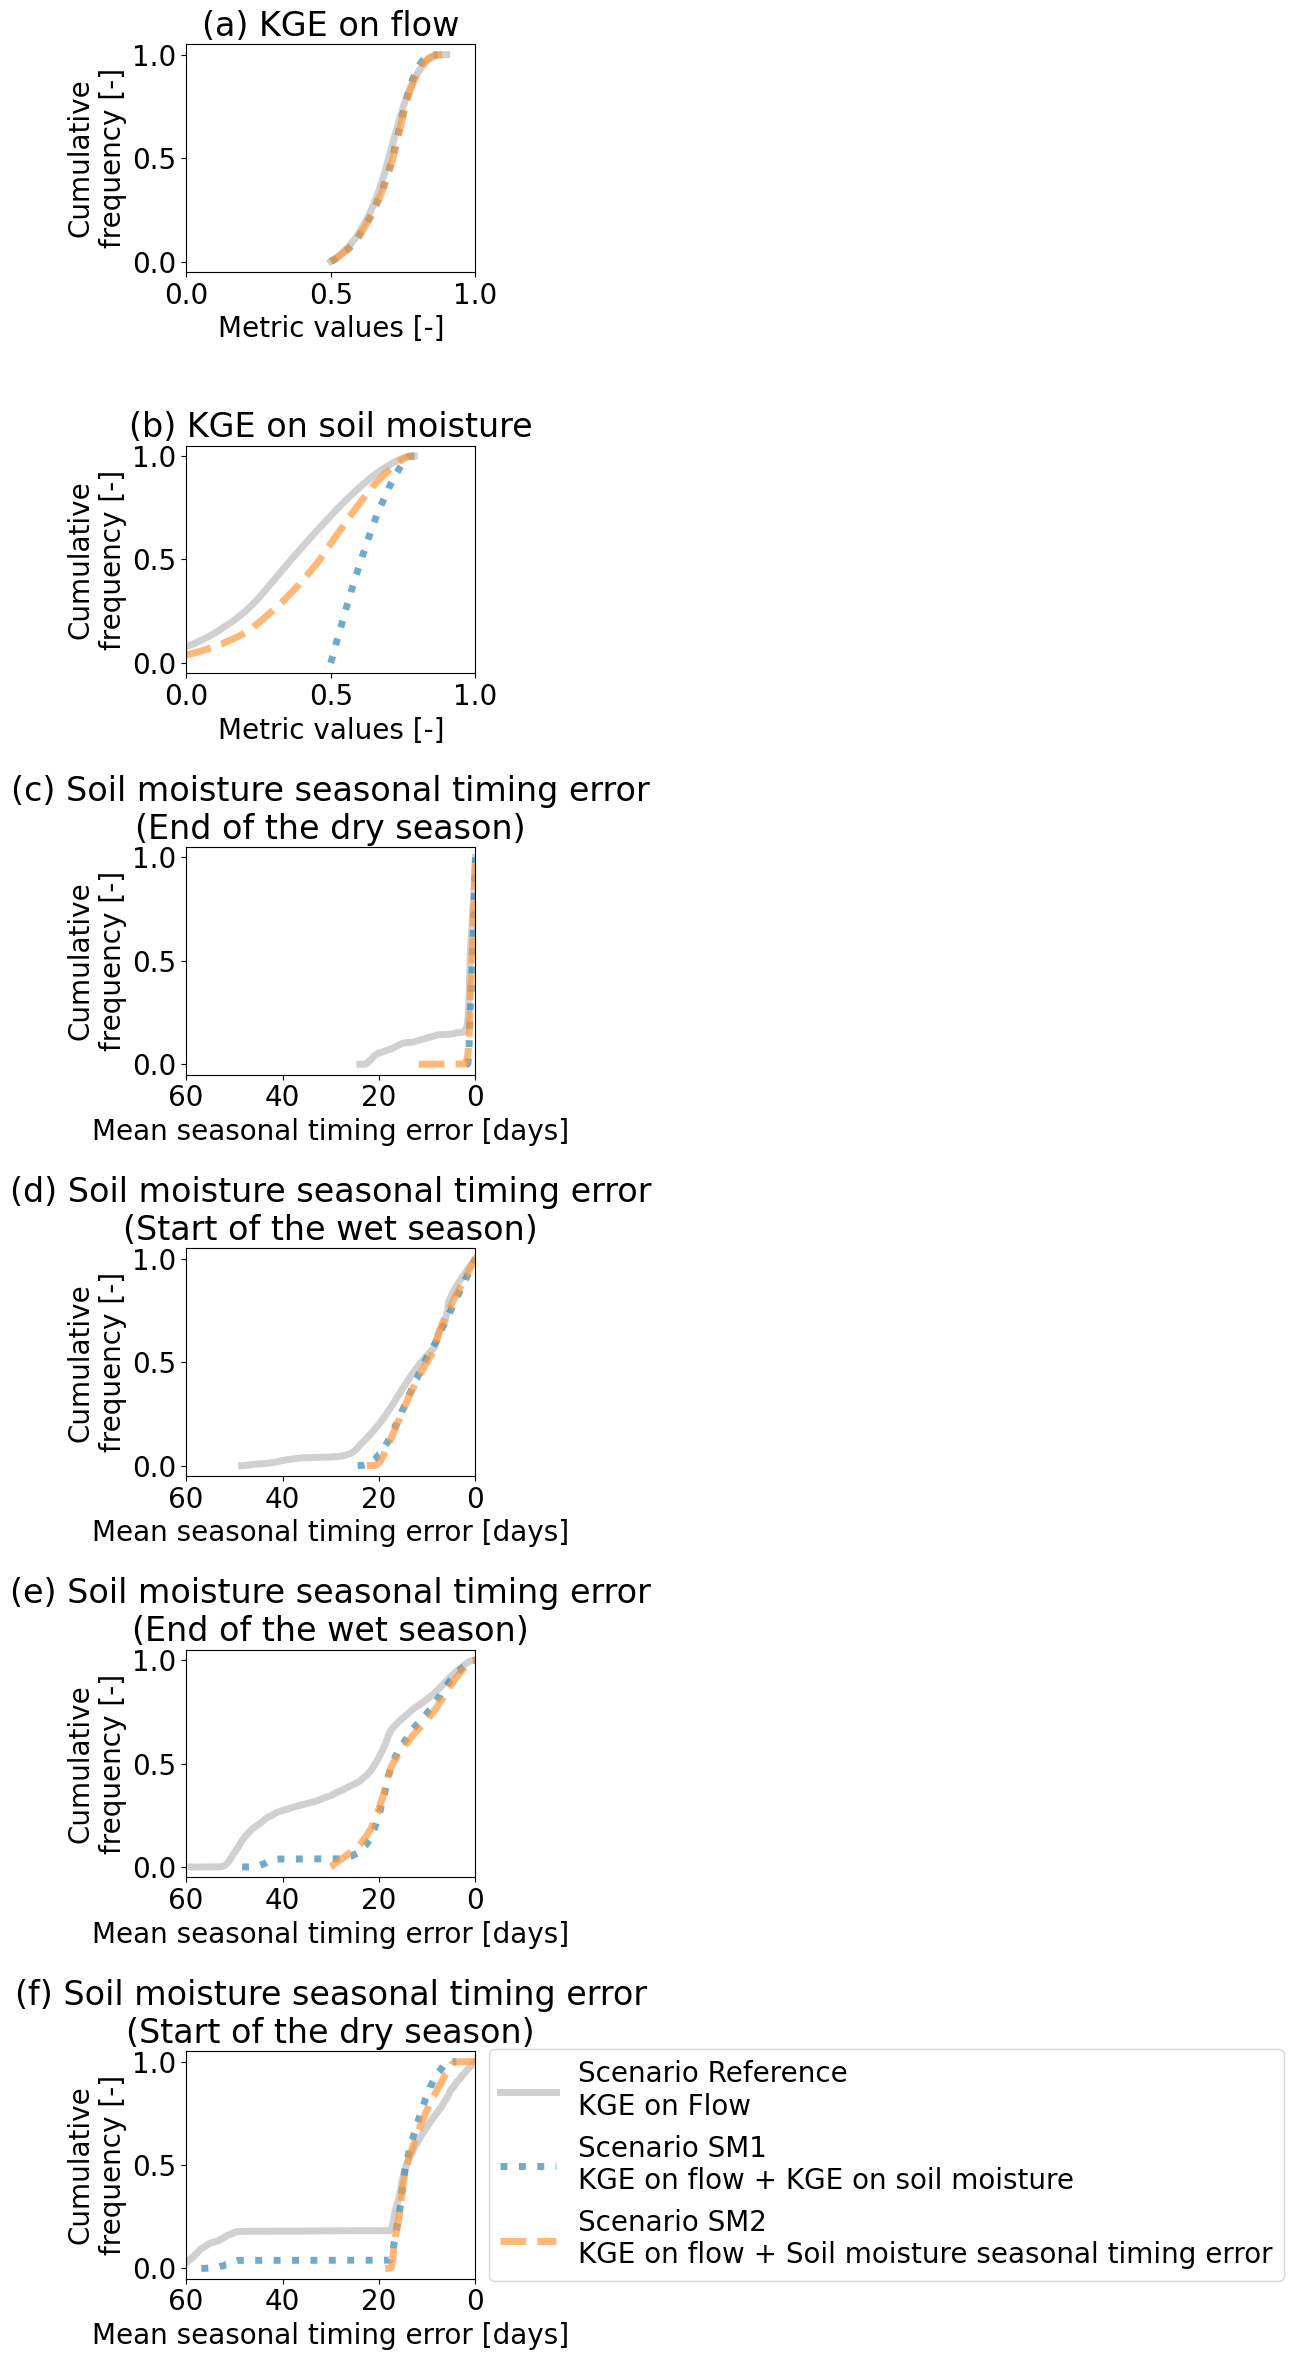

In [9]:
# Create a mapping between fig_title and eval_results_names
title_to_columnname = {
    '(a) KGE on flow': 'KGE on Flow',
    '(b) KGE on soil moisture': 'KGE on Soil',
    '(c) Soil moisture seasonal timing error\n(End of the dry season)': 'SeasonTrans of Soil dry2wet_start',
    '(d) Soil moisture seasonal timing error\n(Start of the wet season)': 'SeasonTrans of Soil dry2wet_end',
    '(e) Soil moisture seasonal timing error\n(End of the wet season)': 'SeasonTrans of Soil wet2dry_start',
    '(f) Soil moisture seasonal timing error\n(Start of the dry season)': 'SeasonTrans of Soil wet2dry_end'
}

num_subplots = len(title_to_columnname)
fig, axs = plt.subplots(num_subplots, 1, figsize=(5, 4*num_subplots))

# Iterate over the metrics
for idx, (title, column_name) in enumerate(title_to_columnname.items()):
    ax = axs[idx]
    plt.rc('font', size=20)

    # Iterate over criteria
    for i in range(1, n_criteria+1):
        data = eval_results[eval_results['criteria_id'] == i].copy()
        data_np = data[column_name].values

        #sort data
        x = np.sort(data_np)
        
        if 'SeasonTrans' in column_name:
            x = x[::-1]

        #calculate CDF values
        y = 1. * np.arange(len(x)) / (len(x) - 1)
        
        #plot CDF
        if i == 1:
            linestyle='-'
        elif i== 2:
            linestyle=':'
        elif i==3:
            linestyle = '--'

        if column_name ==  'SeasonTrans of Soil dry2wet_start':
            print("stop")
        ax.plot(x, y, label=f"{senario_short_names[i-1]}\n{senario_names[i-1]}", linewidth=5, alpha=0.7, linestyle=linestyle)
        
    if 'SeasonTrans' in column_name:
        ax.set_xlim([0, 60])
        ax.set_xlabel('Mean seasonal timing error [days]')
        ax.invert_xaxis()
    else:
        ax.set_xlabel('Metric values [-]')
        ax.set_xlim([0, 1])
    ax.set_title(title)
    ax.set_ylabel('Cumulative\nfrequency [-]')
fig.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

output_dir_cdfs = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\figs\rev_fig6_evalCDFs"
fig.savefig(os.path.join(output_dir_cdfs, f'evalCDFs_{site}.pdf'), dpi=600, bbox_inches='tight')


## Load monthly evaluation metrics

In [10]:
for i in range(1, n_criteria+1):
    _eval_results_monthly = pd.read_csv(os.path.join(input_dir, f'criteria_{i}', 'post_evaluations_monthly_metrics.csv'), index_col=0)
    _eval_results_monthly.index = pd.to_datetime(_eval_results_monthly.Time, format="%Y-%m-%d")
    _eval_results_monthly['criteria_id'] = i
    _eval_results_monthly['Month'] = _eval_results_monthly.index.month
    if i==1:
        eval_results_monthly = _eval_results_monthly
    else:
        eval_results_monthly = pd.concat([eval_results_monthly, _eval_results_monthly])

In [11]:
eval_results_monthly['Q_mean_bias'] = eval_results_monthly['Q_mean_sim'] - eval_results_monthly['Q_mean_obs']
eval_results_monthly['high_flow_freq_bias'] = eval_results_monthly['high_flow_freq_sim'] - eval_results_monthly['high_flow_freq_obs']
eval_results_monthly['RR_bias'] = eval_results_monthly['RR_sim'] - eval_results_monthly['RR_obs']
eval_results_monthly

,Time,Q_mean_obs,Q_mean_sim,high_flow_freq_obs,high_flow_freq_sim,RR_obs,RR_sim,criteria_id,Month,Q_mean_bias,high_flow_freq_bias,RR_bias
Time,,,,,,,,,,,,
2015-08-31,2015-08-31,NaN,NaN,0.000000,0.000000,NaN,NaN,1,8,NaN,0.000000,NaN
2015-09-30,2015-09-30,0.020054,0.005461,0.000000,0.000000,0.149257,0.040646,1,9,-0.014593,0.000000,-0.108610
2015-10-31,2015-10-31,0.038229,0.011133,0.000000,0.000000,0.180686,0.052619,1,10,-0.027096,0.000000,-0.128067
2015-11-30,2015-11-30,0.076052,0.048246,0.000000,0.000000,0.268777,0.170507,1,11,-0.027806,0.000000,-0.098270
2015-12-31,2015-12-31,0.302375,0.407669,0.290323,0.354839,0.539374,0.727196,1,12,0.105293,0.064516,0.187821
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-28,2018-02-28,0.137944,0.217680,0.071429,0.178571,0.395834,0.624639,3,2,0.079736,0.107143,0.228805
2018-03-31,2018-03-31,0.103635,0.109406,0.000000,0.000000,0.832705,0.879074,3,3,0.005771,0.000000,0.046368
2018-04-30,2018-04-30,0.096229,0.073275,0.000000,0.000000,0.456465,0.347583,3,4,-0.022954,0.000000,-0.108882


# Load and plot timeseries data

## Load quantiles    

In [12]:
def read_quantile_data(var_name):
    for i in range(1, n_criteria+1):
        _df = pd.read_csv(os.path.join(input_dir, f'criteria_{i}', f'quantiles_{var_name}.csv'), index_col=0, parse_dates=True)
        _df['criteria_id'] = i
        if i==1:
            df = _df
        else:
            df = pd.concat([df, _df])
    return df

In [13]:
results_quantile_Q = read_quantile_data("Q")
results_quantile_SM = read_quantile_data("SM")

In [14]:
site_name = case.split('-')[0]
if site_name == "Coweeta":
    obs_file_name = "test_daily_2014_2018_sm_basinavg.csv"
elif site_name == "Mahurangi":
    obs_file_name = "test_daily_1998_2001_sm_basinavg.csv"

obs = pd.read_csv(os.path.join(home_dir, "data", site_name, obs_file_name))
obs["Time"] = pd.to_datetime(obs["Time"], format="%Y-%m-%d")
obs.set_axis(obs["Time"], axis=0, inplace=True)
obs

,Time,Flow,Rainfall,Soil Moisture Content,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Total Discharge,Timestep
Time,,,,,,,,,,
2015-08-04,2015-08-04,0.000548,0.000254,0.153545,0,0,0,0,66.294,276
2015-08-05,2015-08-05,0.000595,0.000000,0.151452,0,0,0,0,72.009,277
2015-08-06,2015-08-06,0.000765,0.005080,0.164292,0,0,0,0,92.583,278
2015-08-07,2015-08-07,0.000680,0.000762,0.164678,0,0,0,0,82.296,279
2015-08-08,2015-08-08,0.000614,0.000000,0.159843,0,0,0,0,74.295,280
...,...,...,...,...,...,...,...,...,...,...
2018-05-30,2018-05-30,0.020725,0.071886,0.366092,0,0,0,0,2507.742,1306
2018-05-31,2018-05-31,0.013933,0.000762,0.339694,0,0,0,0,1685.925,1307
2018-06-01,2018-06-01,0.010599,0.002540,0.325503,0,0,0,0,1282.446,1308


## Plot quantiles

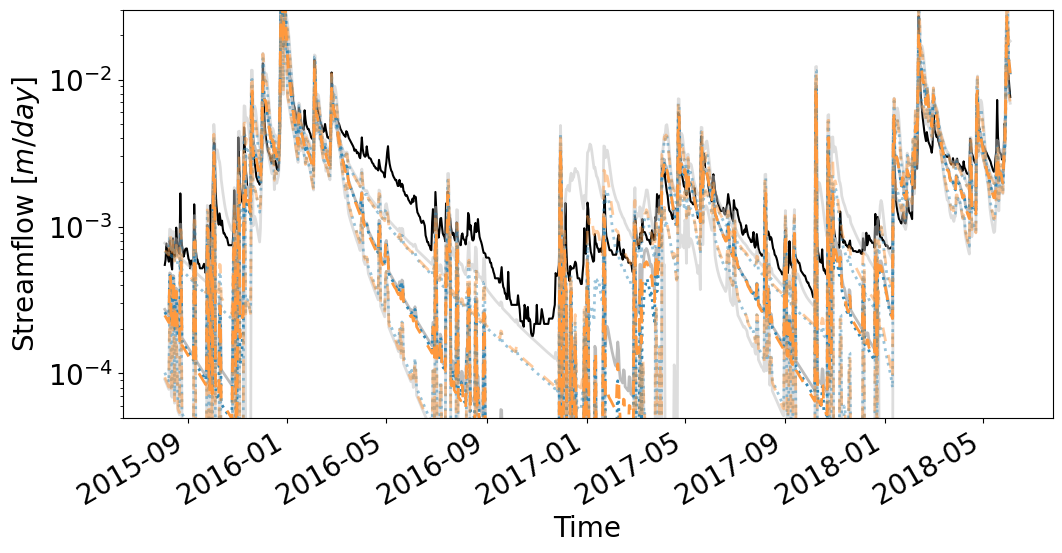

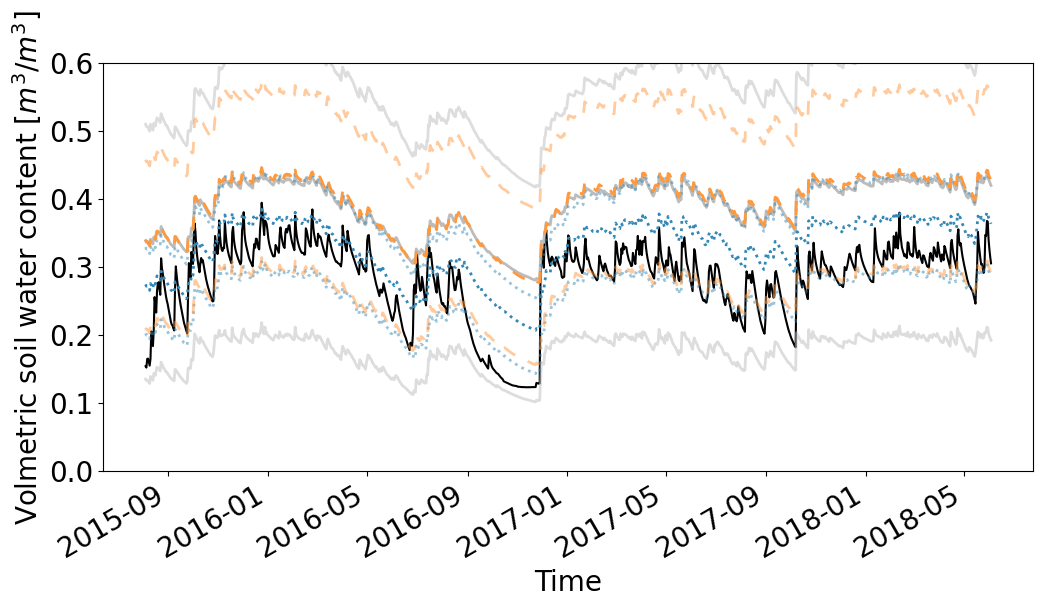

In [16]:
# Flow Plot
if site_name == "Mahurangi":
    ylim_flow = [1E-5, 1E-1]
    ylim_sm = [0.2, 0.65]
    xlim = ['2000-03-01', '2001-02-28']
elif site_name == "Coweeta":
    ylim_flow =  [5E-5, 3E-2]
    ylim_sm = [0, 0.6]
    xlim = ['2016-11-01', '2017-10-30']

def plot_time_series(data, obs_data, var_name, ylim):
    # plot_title = f'Predicted ranges ({quantiles[0]}, {quantiles[-1]} percentiles)'

    plt.rcParams.update({'font.size':20})
    f = plt.figure(figsize=(12, 6))
    ax = f.add_subplot()
    ax.plot(obs_data["Time"], obs_data[var_name], color='k', label='Observed')
    
    for i in range(1, n_criteria+1):
        if i == 1:
            linestyle='-'
        elif i== 2:
            linestyle=':'
        elif i==3:
            linestyle =  (0, (5, 5))
    
        df_simrange = data[data['criteria_id'] == i].copy()
        # plt.fill_between(df_simrange.index, df_simrange['upperlim'], df_simrange['lowerlim'], facecolor=color[i-1], alpha=0.2, interpolate=True, label=f"Senario {senario_short_names[i-1]}\n({senario_names[i-1]})")
        df_simrange['median'].plot(color=color[i-1], alpha=1, ax=ax, linewidth=2, linestyle=linestyle, label=f"{senario_short_names[i-1]}:\n{senario_names[i-1]}\nMedian")
        df_simrange['upperlim'].plot(color=color[i-1], alpha=0.5, ax=ax, linewidth=2, linestyle=linestyle, label=f'{quantiles[0]}th, {quantiles[-1]}th percentiles')
        df_simrange['lowerlim'].plot(color=color[i-1], alpha=0.5, ax=ax, linewidth=2, linestyle=linestyle, label='_Hidden')
        
    ax.set_ylim(ylim)
    # ax.set_xlim(xlim)
    ax.set_xlabel('Time')
    if var_name == "Flow":
        ylabel =  r'Streamflow $[m/day]$'
    elif var_name == "Soil Moisture Content":
        ylabel = r"Volmetric soil water content $[m^3/m^3]$"
    ax.set_ylabel(ylabel)
    if var_name == "Flow":
        ax.set_yscale('log')
    # ax.set_title(plot_title)
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    f.autofmt_xdate()

    return f, ax


# Flow Duration Curve Plot
f, ax = plot_time_series(results_quantile_Q, obs, "Flow", ylim_flow)
output_fig_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\figs\rev_fig7_Q"
f.savefig(os.path.join(output_fig_dir, f'timeseries_Q_{site}.pdf'), dpi=600, bbox_inches='tight')

# Soil Moisture Cumulative Frequency Curve Plot
f, ax = plot_time_series(results_quantile_SM, obs, "Soil Moisture Content", ylim_sm)
output_fig_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\figs\rev_fig5_SM"
f.savefig(os.path.join(output_fig_dir, f'timeseries_SM_{site}.pdf'), dpi=600, bbox_inches='tight')

## Plot quantiles in FDC

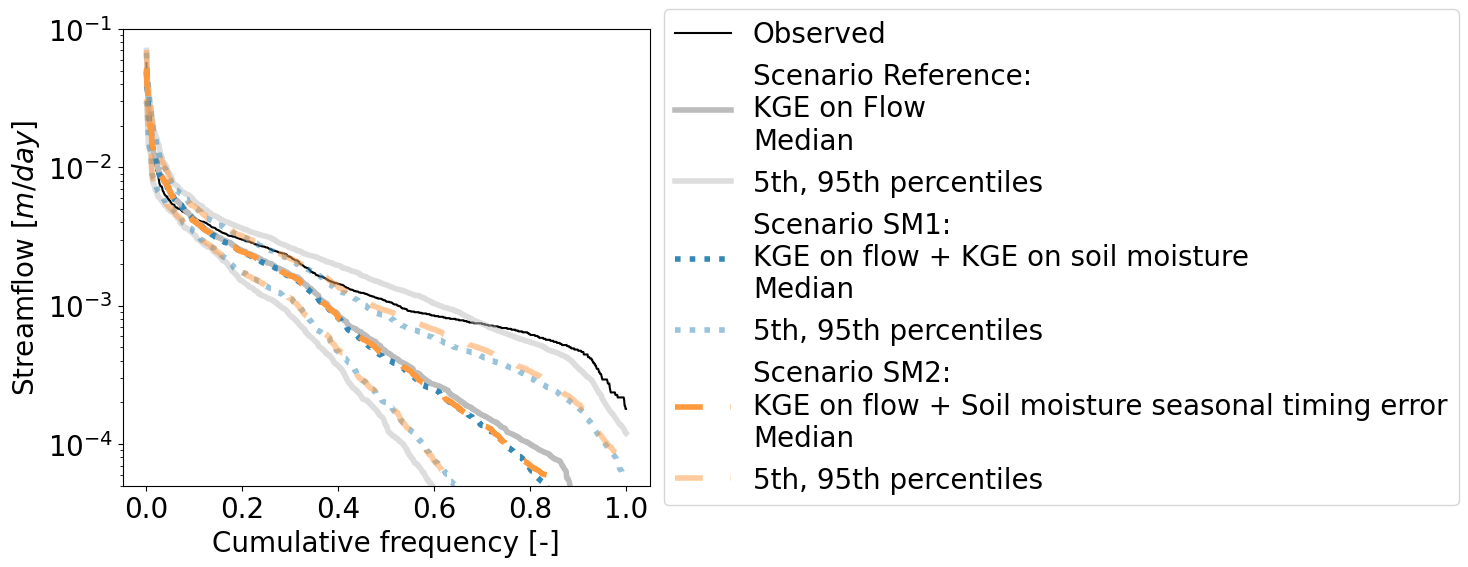

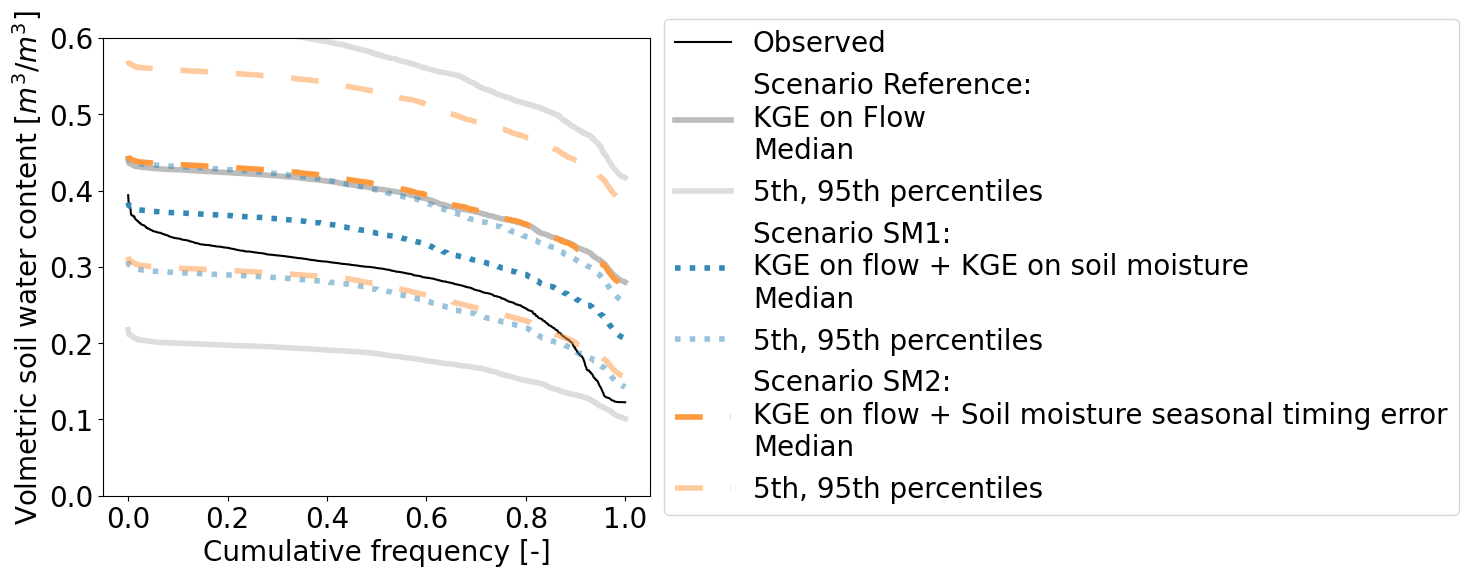

In [17]:
# Flow Plot
if site_name == "Mahurangi":
    ylim_flow = [1E-5, 1E-0]
    ylim_sm = [0.2, 0.65]
elif site_name == "Coweeta":
    ylim_flow =  [5E-5, 1E-1]
    ylim_sm = [0, 0.6]

def plot_fdc(data, obs_data, var_name, ylim):
    plt.rcParams.update({'font.size':20})
    f = plt.figure(figsize=(7, 6))
    ax = f.add_subplot()

    # Observed data plot
    obs_fdc_x = np.sort(obs_data[var_name].values)[::-1]
    obs_fdc_y = np.arange(len(obs_fdc_x)) / (len(obs_fdc_x) - 1)
    ax.plot(obs_fdc_y, obs_fdc_x, color='k', label='Observed')

    # Scenario plots
    for i in range(1, n_criteria+1):
        df_simrange = data[data['criteria_id'] == i].copy()

        if i == 1:
            linestyle='-'
        elif i== 2:
            linestyle=':'
        elif i==3:
            linestyle = (0, (5, 5)) #'--'

        for quantile in ['median', 'upperlim', 'lowerlim']:
            fdc_x = np.sort(df_simrange[quantile].values)[::-1]
            fdc_y = np.arange(len(fdc_x)) / (len(fdc_x) - 1)
            if quantile == 'median':
                ax.plot(fdc_y, fdc_x, color=color[i-1], alpha=1.0, linewidth=4,  linestyle=linestyle, label=f"{senario_short_names[i-1]}:\n{senario_names[i-1]}\nMedian")
            elif quantile=='upperlim':
                ax.plot(fdc_y, fdc_x, color=color[i-1], alpha=0.5, linestyle=linestyle, label=f'{quantiles[0]}th, {quantiles[-1]}th percentiles', linewidth=4)
            else:
                ax.plot(fdc_y, fdc_x, color=color[i-1], alpha=0.5, linestyle=linestyle, label='_Hidden', linewidth=4)

    if var_name == "Flow":
        ylabel =  r'Streamflow $[m/day]$'
    elif var_name == "Soil Moisture Content":
        ylabel = r"Volmetric soil water content $[m^3/m^3]$"
    ax.set_ylabel(ylabel)
    if var_name == "Flow":
        ax.set_yscale('log')

    ax.set_ylim(ylim)
    ax.set_xlabel('Cumulative frequency [-]')
    ax.set_ylabel(ylabel)
    title = f'Predicted Ranges of {var_name}'
    f.tight_layout()
    # ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return f, ax

# Assuming that the necessary data and variables (like senario_short_names, senario_names, results_quantile_Q, results_quantile_SM, obs, and output_dir) are defined

# Flow Duration Curve Plot
f, ax = plot_fdc(results_quantile_Q, obs, 'Flow', ylim_flow)
output_fig_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\figs\rev_fig7_Q"
f.savefig(os.path.join(output_fig_dir, f'FDC_Q_{site}.pdf'), dpi=600, bbox_inches='tight')

# Soil Moisture Cumulative Frequency Curve Plot
output_fig_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\figs\rev_fig5_SM"
f, ax = plot_fdc(results_quantile_SM, obs, 'Soil Moisture Content', ylim_sm)
f.savefig(os.path.join(output_fig_dir, f'FDC_SM_{site}.pdf'), dpi=600, bbox_inches='tight')
